### Importing the Necessary Packages

In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from preprocessing import save_insurance_data_to_csv, missing_values_table, get_categorical_columns, get_unique_values_count, update_gender_based_on_title, update_marital_status_based_on_title

### CHANGING THE TEXT DATA TO CSV

In [ ]:
# Example usage
text_file_path = r'C:\Users\Blen\OneDrive\Documents\10Academy\Week3\Data\MachineLearningRating_v3.txt'  # Replace with your actual file path
save_insurance_data_to_csv(text_file_path)

### READING THE CSV DATA

In [5]:
df = pd.read_csv('..\data\insurance_data.csv')

C:\Users\Blen\AppData\Local\Temp\ipykernel_15568\584046861.py:1: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..\data\insurance_data.csv')


In [6]:
df.head()

,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### EXPLORING THE DATA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1000098 non-null  int64  
 1   UnderwrittenCoverID       1000098 non-null  int64  
 2   PolicyID                  1000098 non-null  int64  
 3   TransactionMonth          1000098 non-null  object 
 4   IsVATRegistered           1000098 non-null  bool   
 5   Citizenship               1000098 non-null  object 
 6   LegalType                 1000098 non-null  object 
 7   Title                     1000098 non-null  object 
 8   Language                  1000098 non-null  object 
 9   Bank                      854137 non-null   object 
 10  AccountType               959866 non-null   object 
 11  MaritalStatus             991839 non-null   object 
 12  Gender                    990562 non-null   object 
 13  Country                   1

Checking for missing values

In [29]:
missing_values_info = missing_values_table(df)
missing_values_info.head(22)

The dataframe has 52columns.
There are 21 columns that have missing values.



,Missing Values,% of Total Values,DType
CrossBorder,999400,99.9,object
CustomValueEstimate,779642,78.0,float64
Rebuilt,641901,64.2,object
WrittenOff,641901,64.2,object
Converted,641901,64.2,object
NewVehicle,153295,15.3,object
Bank,145961,14.6,object
AccountType,40232,4.0,object
Gender,9536,1.0,object
MaritalStatus,8259,0.8,object


Getting the unique values for every categorical data

In [16]:
unique_values = get_unique_values_count(df, get_categorical_columns(df))

In [17]:
unique_values.head()

,Column,Unique Value,Count,Percentage
52,AccountType,Current account,597938,62.29
53,AccountType,Savings account,358207,37.32
54,AccountType,Transmission account,3721,0.39
782,AlarmImmobiliser,Yes,999861,99.98
783,AlarmImmobiliser,No,237,0.02


In [18]:
unique_values.loc[unique_values['Column'] == 'Title'].head()

,Column,Unique Value,Count,Percentage
35,Title,Mr,933555,93.35
36,Title,Mrs,45850,4.58
37,Title,Ms,13269,1.33
38,Title,Miss,6614,0.66
39,Title,Dr,810,0.08


In [21]:
unique_values.loc[unique_values['Column'] == 'Gender'].head()

,Column,Unique Value,Count,Percentage
58,Gender,Male,924019,93.28
59,Gender,Female,65733,6.64
60,Gender,Not specified,810,0.08


#### Deriving 'Not specified' Values of Gender from Title

In [17]:
df = update_gender_based_on_title(df, 'Title','Gender')

In [9]:
unique_values = get_unique_values_count(df, get_categorical_columns(df))

In [27]:
unique_values.loc[unique_values['Column'] == 'Gender'].head()

,Column,Unique Value,Count,Percentage
58,Gender,Male,924019,93.28
59,Gender,Female,65733,6.64
60,Gender,Not specified,810,0.08


#### Deriving 'Not specified' Values for MaritalStatus from Title

In [18]:
df = update_marital_status_based_on_title(df, 'Title', 'MaritalStatus')

### UNIVARIATE ANALYSIS

#### For Categorical Columns

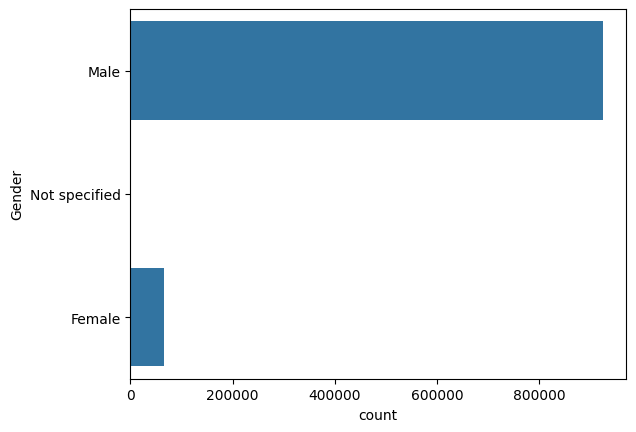

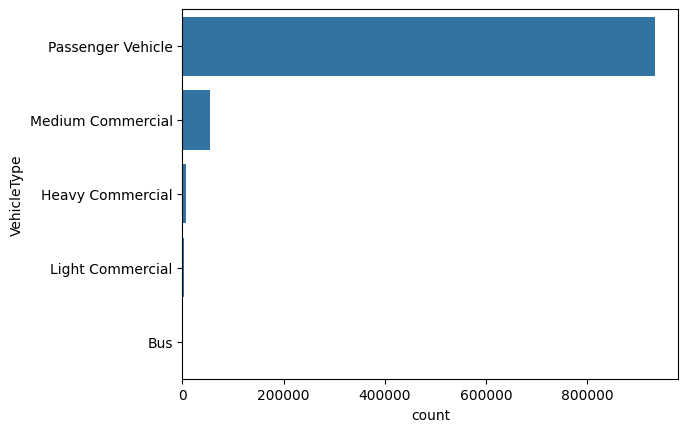

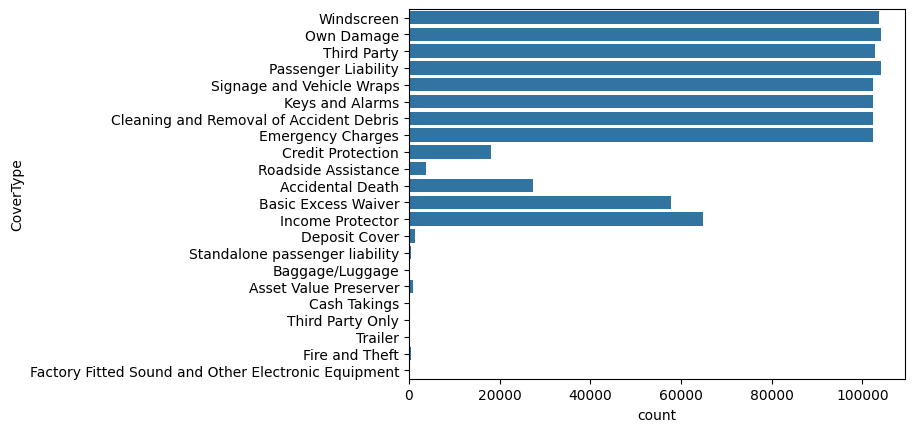

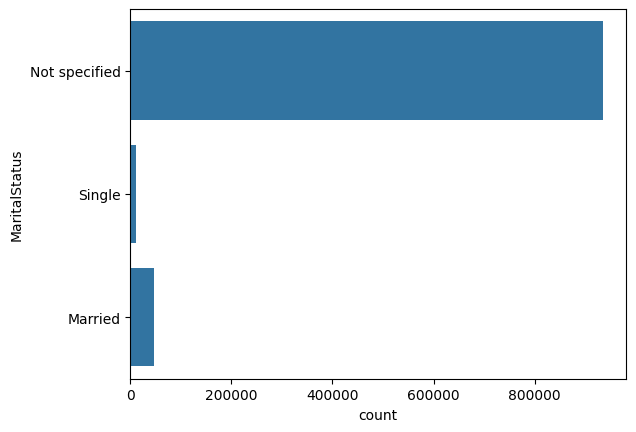

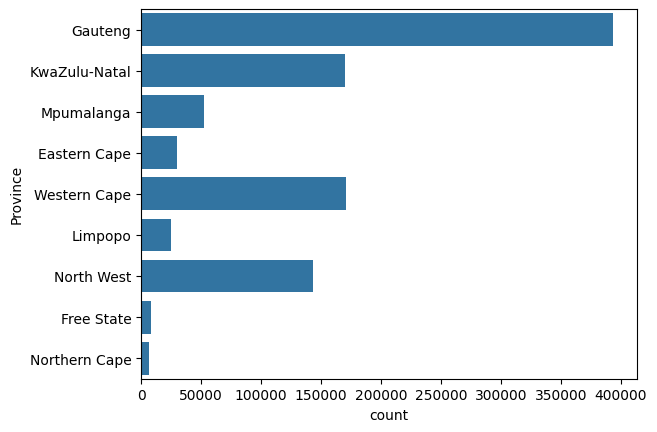

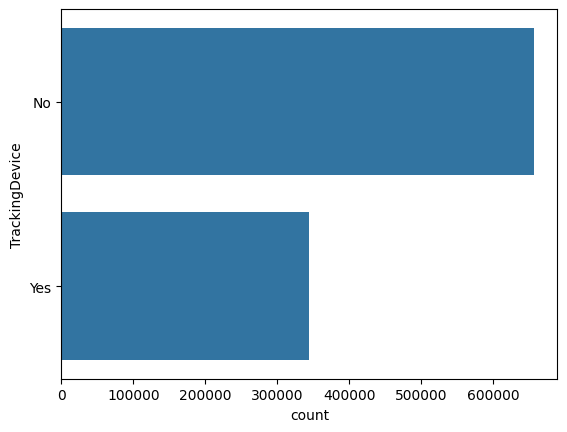

In [19]:
# Bar chart for categorical variables
categorical_columns = ['Gender', 'VehicleType', 'CoverType', 'MaritalStatus','Province','TrackingDevice']
for col in categorical_columns:
    sns.countplot(y=col, data=df)
    plt.show()


#### For Numerical Columns

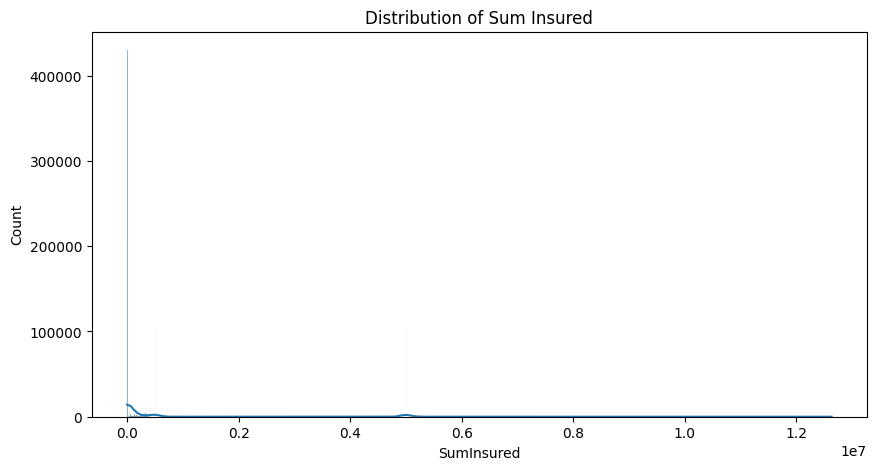

In [12]:

plt.figure(figsize=(10, 5))
sns.histplot(df['SumInsured'], kde=True)
plt.title(f'Distribution of Sum Insured')
plt.show()

#### Claims and Premiums

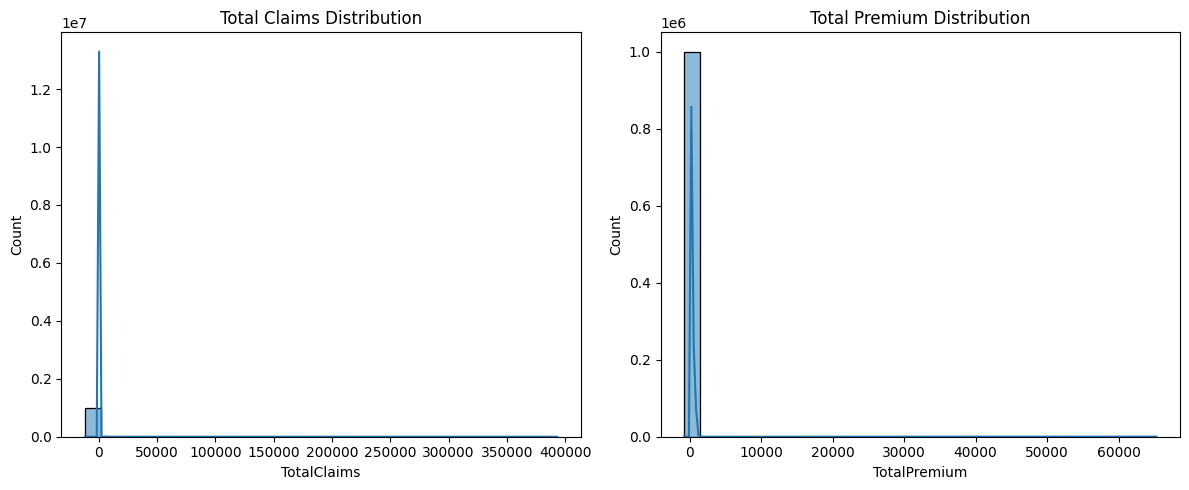

In [10]:
# Claims and Premium Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['TotalClaims'], bins=30, kde=True)
plt.title('Total Claims Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['TotalPremium'], bins=30, kde=True)
plt.title('Total Premium Distribution')

plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS

#### Trends Across Geography

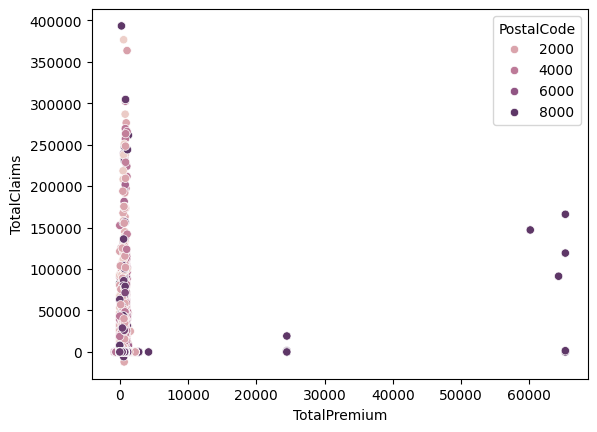

In [9]:
# Scatter plot to explore relationships
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=df)
plt.show()


#### Total Claims vs. Location (Province)

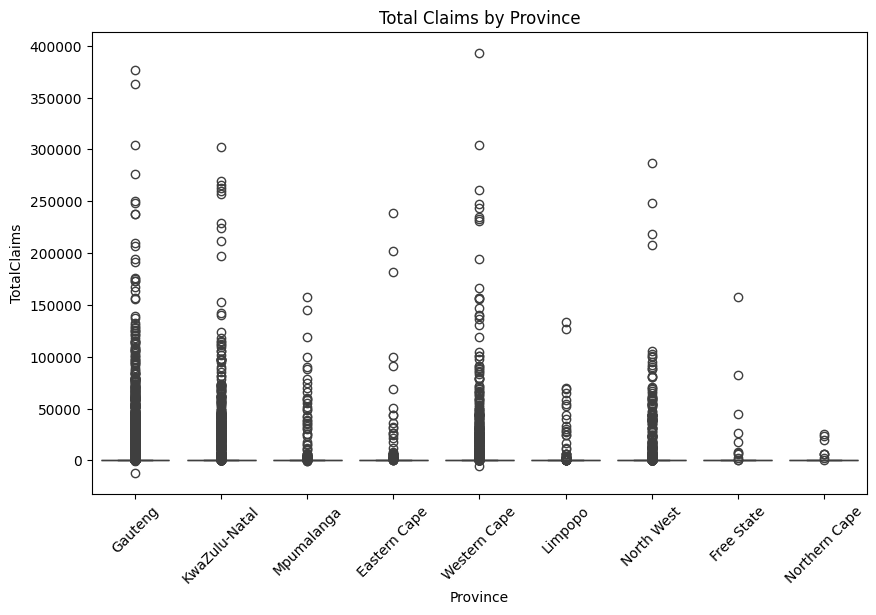

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Province', y='TotalClaims', data=df)
plt.title('Total Claims by Province')
plt.xticks(rotation=45)
plt.show()


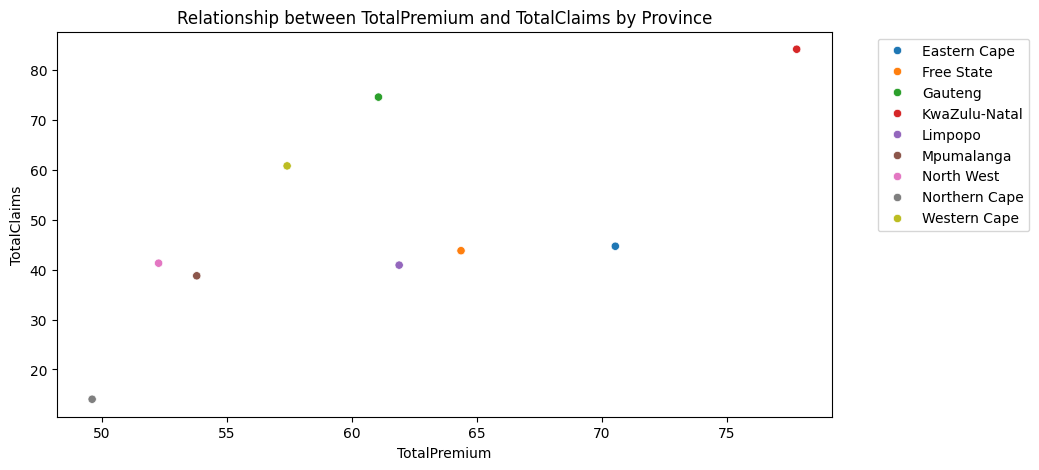

In [24]:
# Group by Province and calculate average TotalPremium and TotalClaims
province_summary = df.groupby('Province')[['TotalPremium', 'TotalClaims']].mean().reset_index()

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=province_summary)
plt.title('Relationship between TotalPremium and TotalClaims by Province')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Total Claims vs. Marital Status

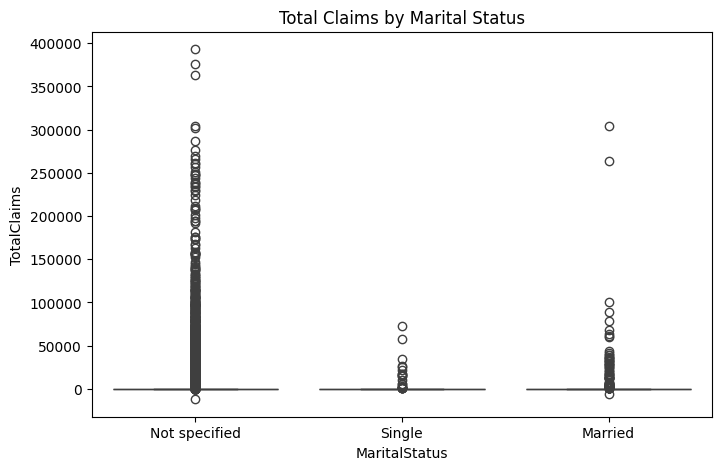

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='MaritalStatus', y='TotalClaims', data=df)
plt.title('Total Claims by Marital Status')
plt.show()


#### Total Claims vs. Gender

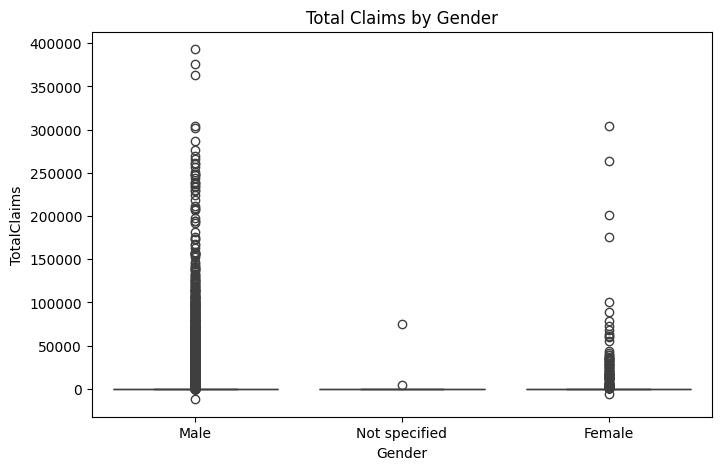

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='TotalClaims', data=df)
plt.title('Total Claims by Gender')
plt.show()


#### Total Claims vs. Vehicle Age (RegistrationYear)

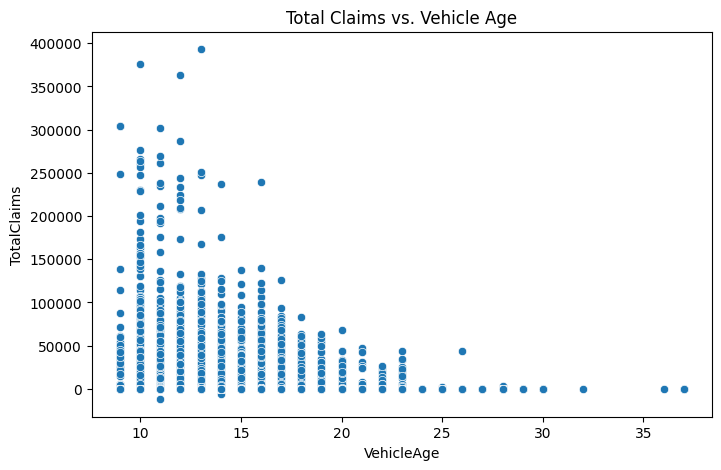

In [25]:
# Calculate vehicle age
df['VehicleAge'] = 2024 - df['RegistrationYear']  # Assuming analysis is done in 2024

plt.figure(figsize=(8, 5))
sns.scatterplot(x='VehicleAge', y='TotalClaims', data=df)
plt.title('Total Claims vs. Vehicle Age')
plt.show()


#### Total Claims vs. Tracking Device

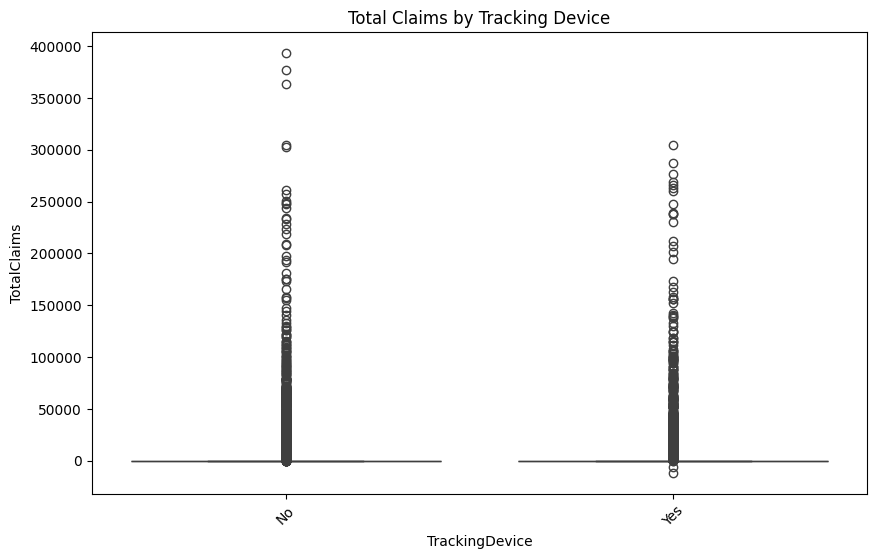

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TrackingDevice', y='TotalClaims', data=df)
plt.title('Total Claims by Tracking Device')
plt.xticks(rotation=45)
plt.show()

### DATA COMPARISON

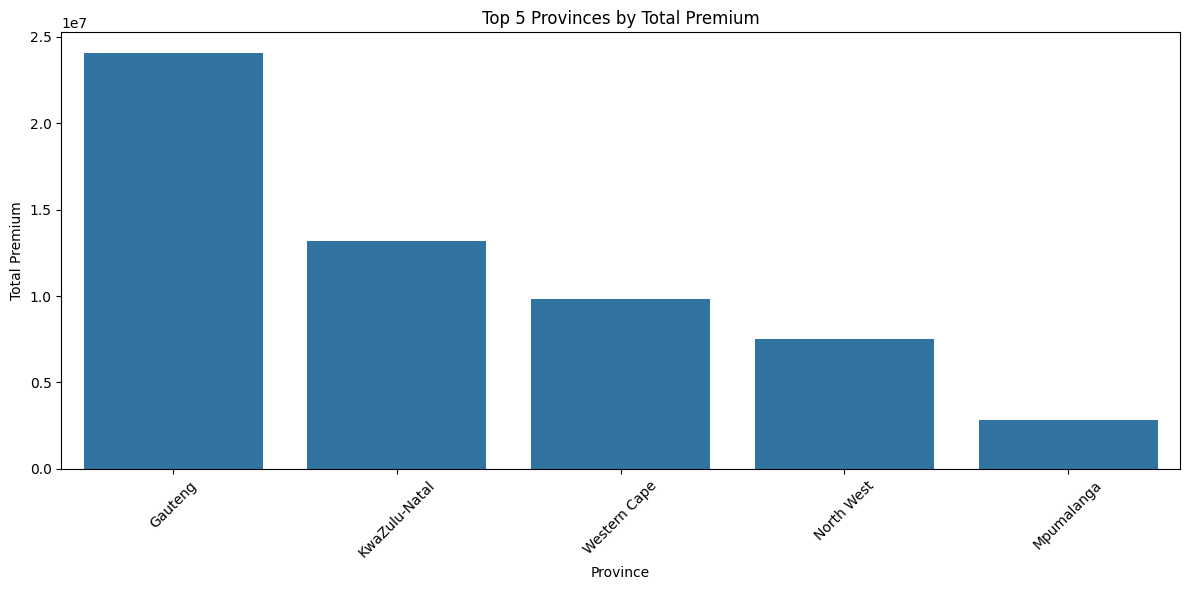

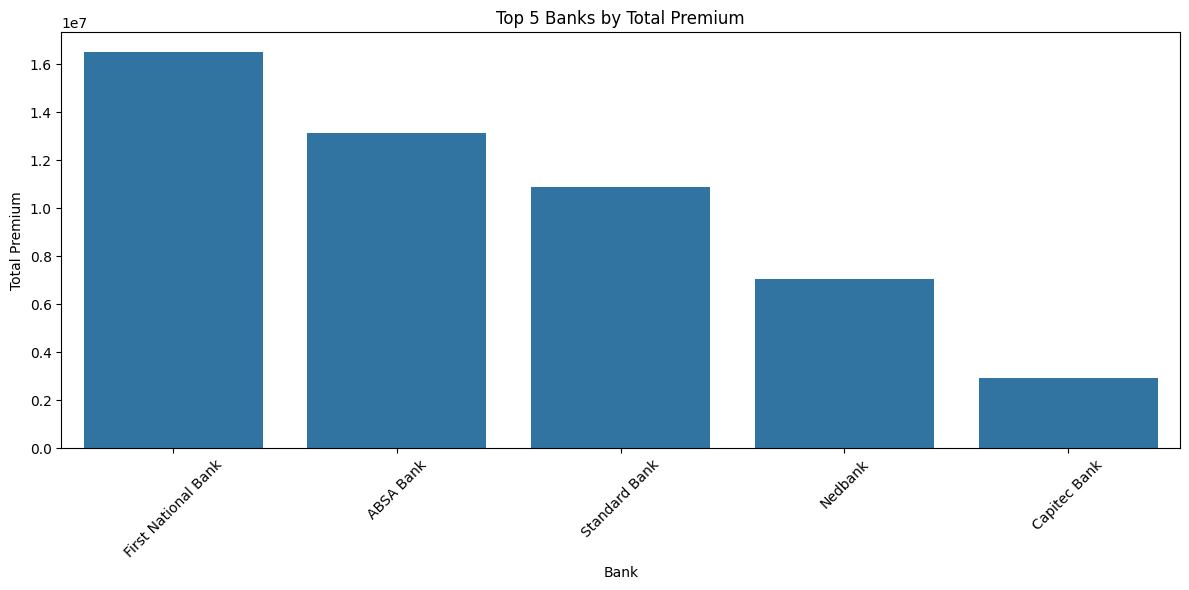

In [46]:
# Top 5 provinces by TotalPremium
top_provinces = df.groupby('Province')['TotalPremium'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_provinces.index, y=top_provinces.values)
plt.title('Top 5 Provinces by Total Premium')
plt.xlabel('Province')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 Banks by TotalPremium
top_provinces = df.groupby('Bank')['TotalPremium'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_provinces.index, y=top_provinces.values)
plt.title('Top 5 Banks by Total Premium')
plt.xlabel('Bank')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Trends Across Gender

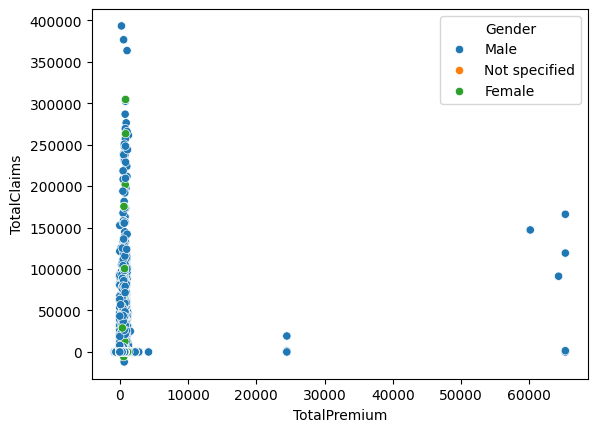

In [21]:
# Scatter plot to explore relationships
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Gender', data=df)
plt.show()



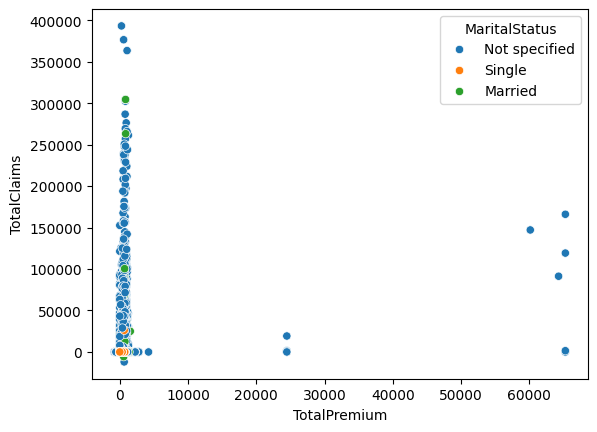

In [22]:
# Scatter plot to explore relationships
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='MaritalStatus', data=df)
plt.show()

### OUTLIER DETECTION

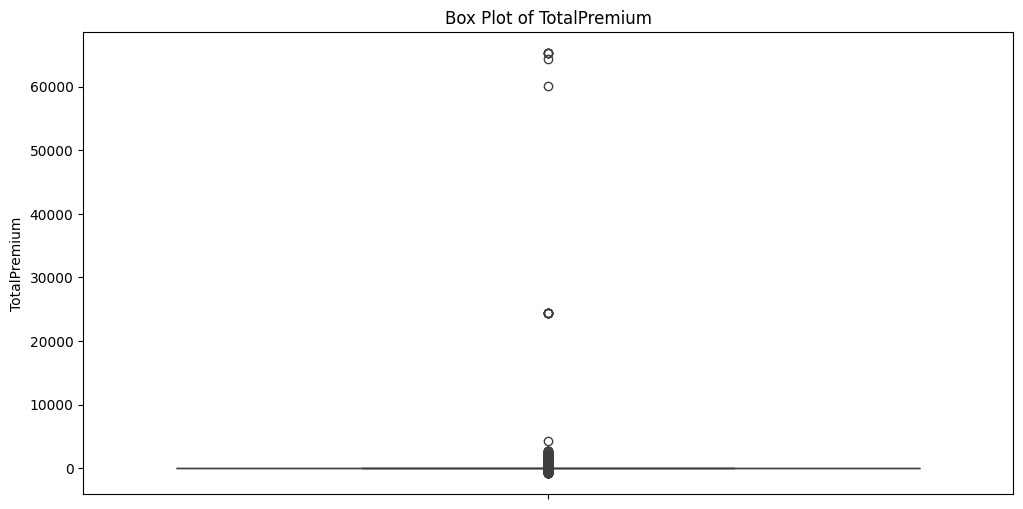

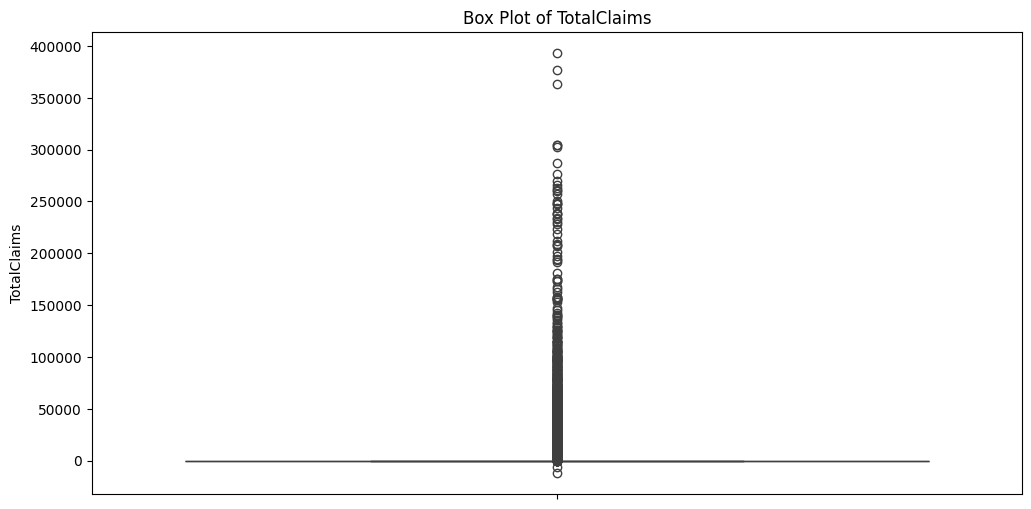

In [12]:
# Box plot for TotalPremium
plt.figure(figsize=(12, 6))
sns.boxplot(df['TotalPremium'])
plt.title('Box Plot of TotalPremium')
plt.show()

# Box plot for TotalClaims
plt.figure(figsize=(12, 6))
sns.boxplot(df['TotalClaims'])
plt.title('Box Plot of TotalClaims')
plt.show()


### Visualization

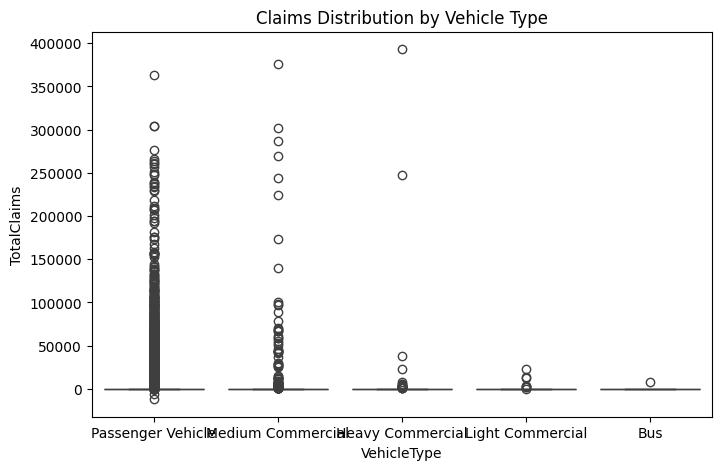

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='VehicleType', y='TotalClaims', data=df)
plt.title('Claims Distribution by Vehicle Type')
plt.show()


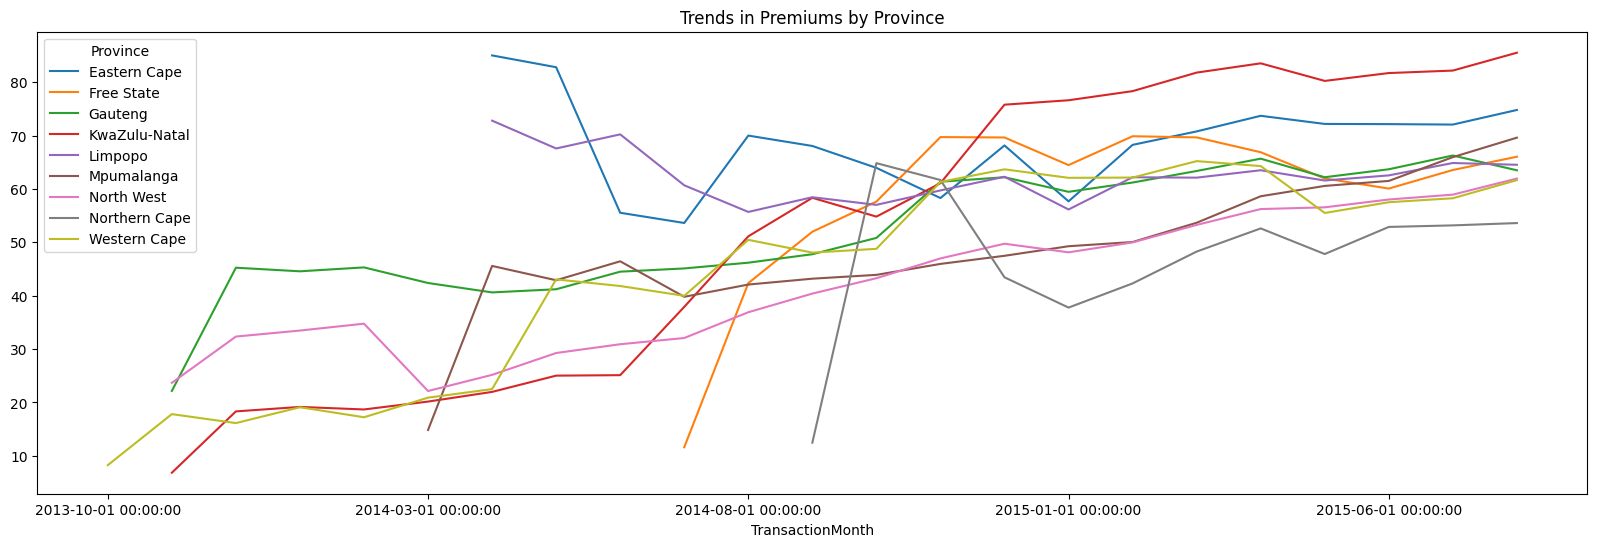

In [17]:
df.groupby(['TransactionMonth', 'Province'])['TotalPremium'].mean().unstack().plot(figsize=(20, 6))
plt.title('Trends in Premiums by Province')
plt.show()


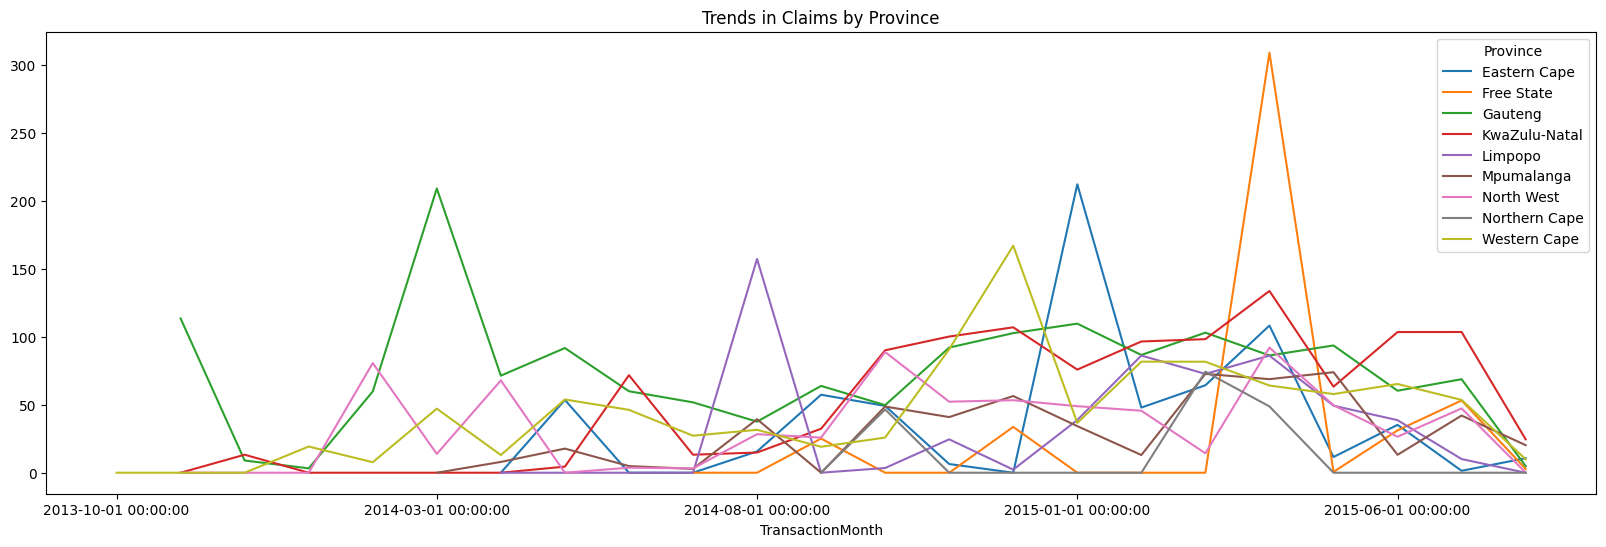

In [37]:
df.groupby(['TransactionMonth', 'Province'])['TotalClaims'].mean().unstack().plot(figsize=(20, 6))
plt.title('Trends in Claims by Province')
plt.show()


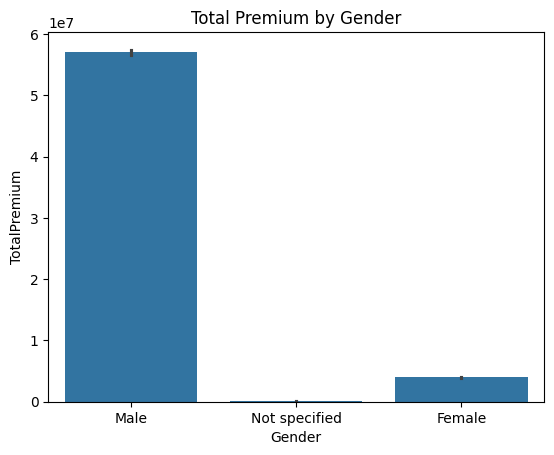

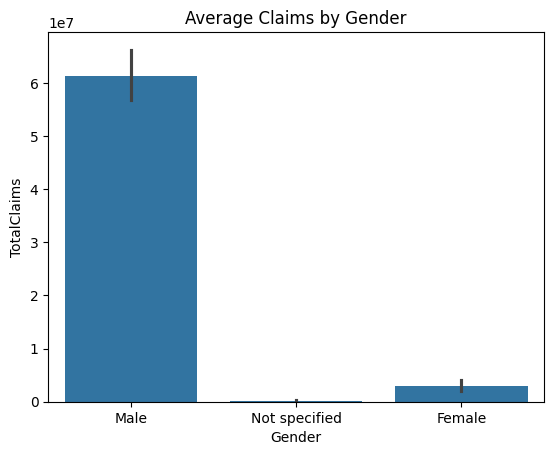

In [29]:
# Bar plot for Gender vs TotalPremium
sns.barplot(x='Gender', y='TotalPremium', data=df, estimator=sum)
plt.title("Total Premium by Gender")
plt.show()

# Bar plot for Gender vs TotalClaims
sns.barplot(x='Gender', y='TotalClaims', data=df, estimator=sum)
plt.title("Average Claims by Gender")
plt.show()

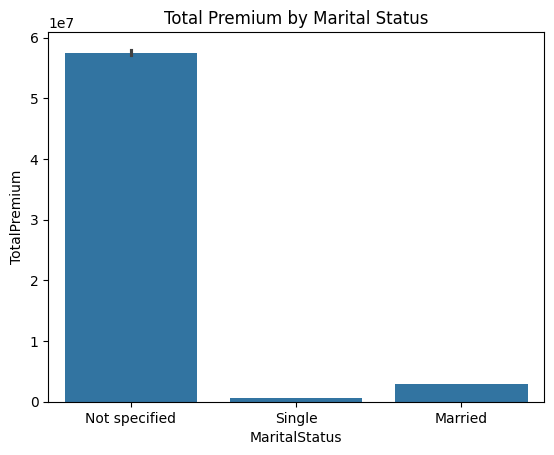

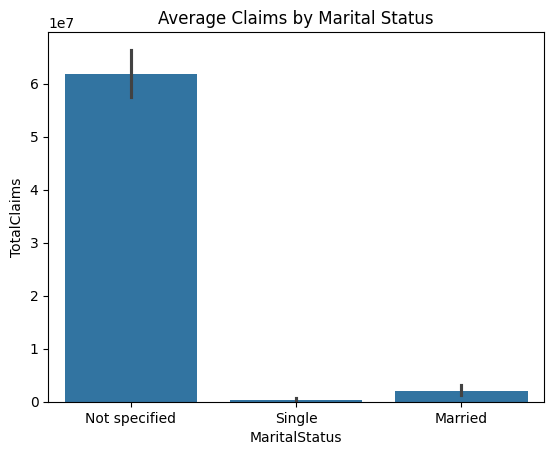

In [32]:
# Bar plot for Gender vs TotalPremium
sns.barplot(x='MaritalStatus', y='TotalPremium', data=df, estimator=sum)
plt.title("Total Premium by Marital Status")
plt.show()

# Bar plot for Gender vs TotalClaims
sns.barplot(x='MaritalStatus', y='TotalClaims', data=df, estimator=sum)
plt.title("Average Claims by Marital Status")
plt.show()

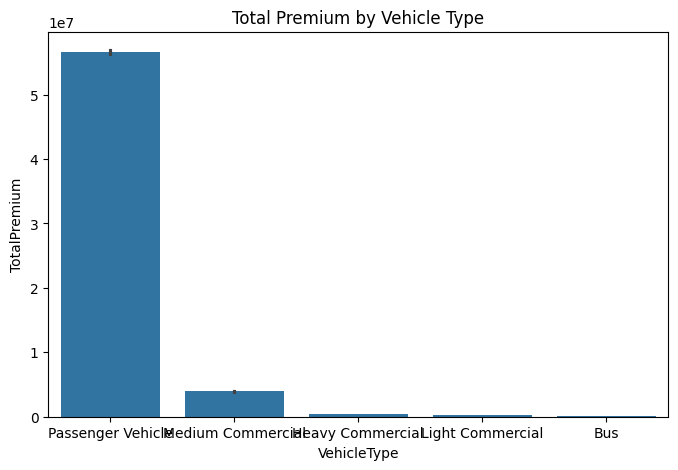

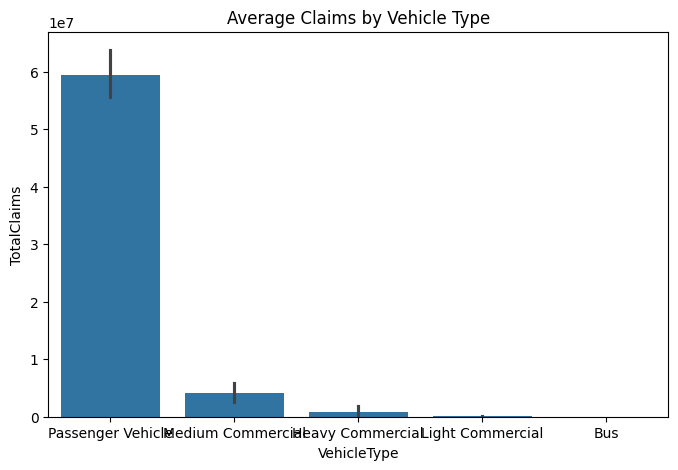

In [28]:
# Bar plot for Gender vs TotalPremium
plt.figure(figsize=(8, 5))
sns.barplot(x='VehicleType', y='TotalPremium', data=df, estimator=sum)
plt.title("Total Premium by Vehicle Type")
plt.show()

# Bar plot for Gender vs TotalClaims
plt.figure(figsize=(8, 5))
sns.barplot(x='VehicleType', y='TotalClaims', data=df, estimator=sum)
plt.title("Average Claims by Vehicle Type")
plt.show()

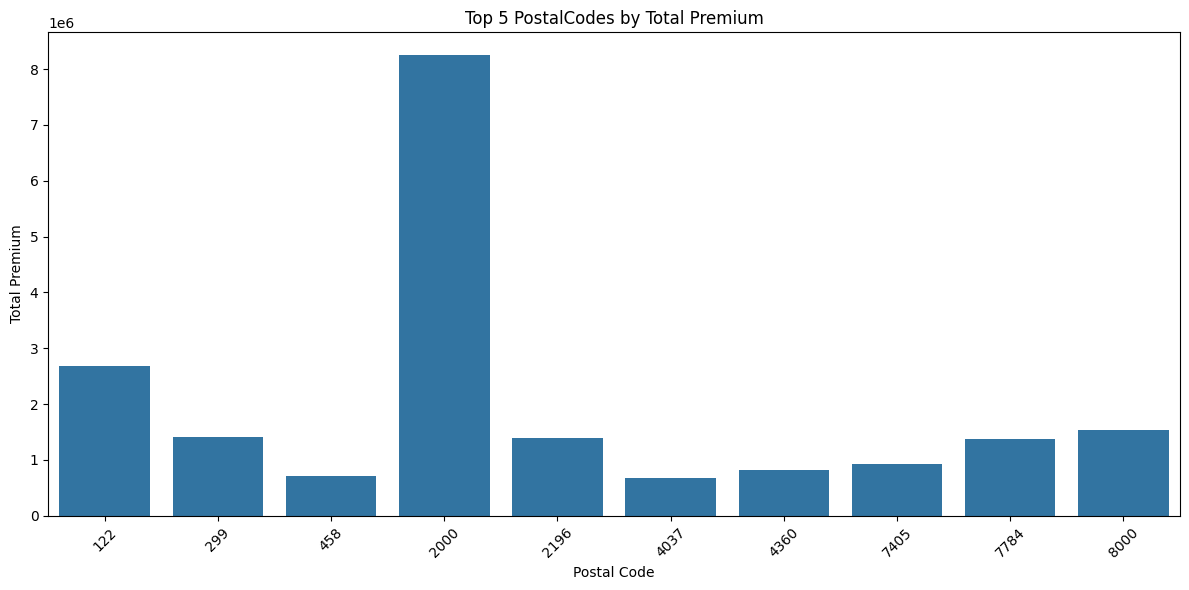

In [52]:
# Top 5 postal code by TotalPremium
top_provinces = df.groupby('PostalCode')['TotalPremium'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_provinces.index, y=top_provinces.values)
plt.title('Top 5 PostalCodes by Total Premium')
plt.xlabel('Postal Code')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

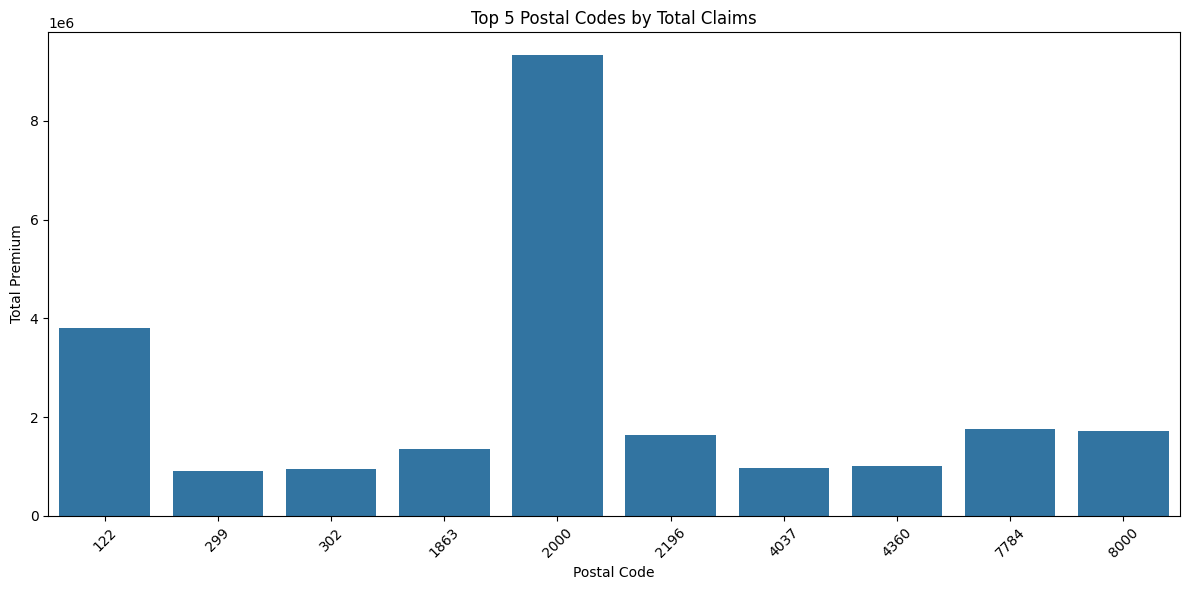

In [53]:
# Top 5 postal code by TotalPremium
top_provinces = df.groupby('PostalCode')['TotalClaims'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_provinces.index, y=top_provinces.values)
plt.title('Top 5 Postal Codes by Total Claims')
plt.xlabel('Postal Code')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()